# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 3 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 3]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL,  columns=['SYNOPCode', 'Time'])
df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Time_4,Time_5,Time_6,Time_8,Time_14,Time_15,Time_16,Time_17,Time_18,Time_19
1116,9.043323,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3745,6.088839,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5409,8.094719,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5414,8.001488,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5418,8.062292,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,12.711575,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
78380,12.316199,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
78381,13.253359,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
78382,12.313026,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B66D4FBF90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B66EBD8850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B66EBD9050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B669290A50>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9563345869906016


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
22           WindSpeedMax  0.540039  0.965698                   14
25          VisibilityMin  0.542675  0.965363                   11
24          VisibilityMax  0.544523  0.965126                   12
27              Frequency  0.546329  0.964895                    9
12                 Time_8  0.547713  0.964717                   24
26               Distance  0.548586  0.964604                   10
20                Time_15  0.550664  0.964335                   16
10                Time_18  0.551048  0.964286                   26
4        RainIntensityMax  0.551810  0.964187                   32
19              WindSpeed  0.551963  0.964167                   17
18                Time_19  0.554376  0.963853                   18
1          ParticulateMax  0.554548  0.963830                   35
7                  Time_1  0.556109  0.963627                   29
0             Particulate  0.556150  0.963621                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
22,WindSpeedMax,0.540039,0.965698,14
25,VisibilityMin,0.542675,0.965363,11
24,VisibilityMax,0.544523,0.965126,12
27,Frequency,0.546329,0.964895,9
12,Time_8,0.547713,0.964717,24
26,Distance,0.548586,0.964604,10
20,Time_15,0.550664,0.964335,16
10,Time_18,0.551048,0.964286,26
4,RainIntensityMax,0.551810,0.964187,32
19,WindSpeed,0.551963,0.964167,17


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_12552\837418228.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


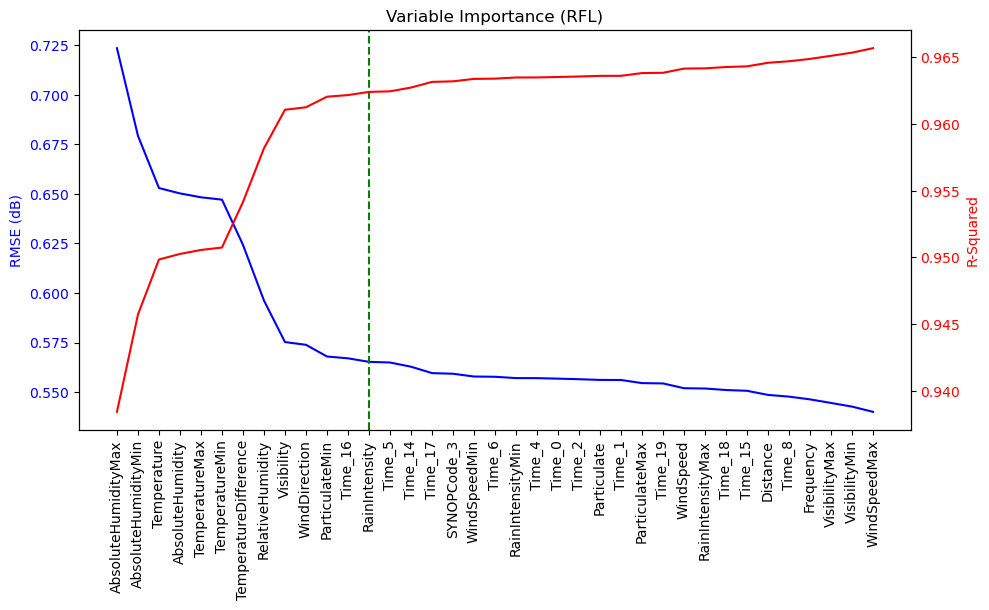

In [22]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 12
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance (RFL)')
plt.show()


In [18]:
selected_features_RFL= [
    'RainIntensity',
    'Time_16',
    'ParticulateMin',
    'WindDirection',
    'Visibility',
    'RelativeHumidity',
    'TemperatureDifference',
    'TemperatureMin',
    'TemperatureMax',
    'AbsoluteHumidity',
    'Temperature',
    'AbsoluteHumidityMin',
    'AbsoluteHumidityMax'
    
]

In [19]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.47995253727474113
Test R^2: 0.9786472490587633


# FSO

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 3 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 3]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO,  columns=['SYNOPCode', 'Time'])

df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Time_4,Time_5,Time_6,Time_8,Time_14,Time_15,Time_16,Time_17,Time_18,Time_19
1116,13.997498,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3745,10.946154,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5409,7.419227,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5414,7.473629,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5418,7.892708,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,10.298313,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
78380,10.361821,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
78381,9.741072,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
78382,9.439828,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [9]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [10]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B6719AB390>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B672CAF210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B672CAFA10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B671F3AD50>},
                   random_state=42, verbose=1)

In [11]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.8085900453569688


In [12]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
29    AbsoluteHumidityMax  2.463034  0.900865                    7
30  TemperatureDifference  2.467288  0.900522                    6
28         TemperatureMax  2.470174  0.900289                    8
25                 Time_0  2.487756  0.898865                   11
24    AbsoluteHumidityMin  2.490983  0.898602                   12
23       AbsoluteHumidity  2.496800  0.898128                   13
20              WindSpeed  2.502963  0.897625                   16
31            Temperature  2.505589  0.897410                    5
21           WindSpeedMin  2.515709  0.896579                   15
22                 Time_5  2.532985  0.895154                   14
8                  Time_2  2.534246  0.895049                   28
27           WindSpeedMax  2.540994  0.894490                    9
18                Time_19  2.541988  0.894407                   18
15                 Time_4  2.543112  0.894314                 

In [13]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
29,AbsoluteHumidityMax,2.463034,0.900865,7
30,TemperatureDifference,2.467288,0.900522,6
28,TemperatureMax,2.470174,0.900289,8
25,Time_0,2.487756,0.898865,11
24,AbsoluteHumidityMin,2.490983,0.898602,12
23,AbsoluteHumidity,2.496800,0.898128,13
20,WindSpeed,2.502963,0.897625,16
31,Temperature,2.505589,0.897410,5
21,WindSpeedMin,2.515709,0.896579,15
22,Time_5,2.532985,0.895154,14


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_12552\1066357725.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


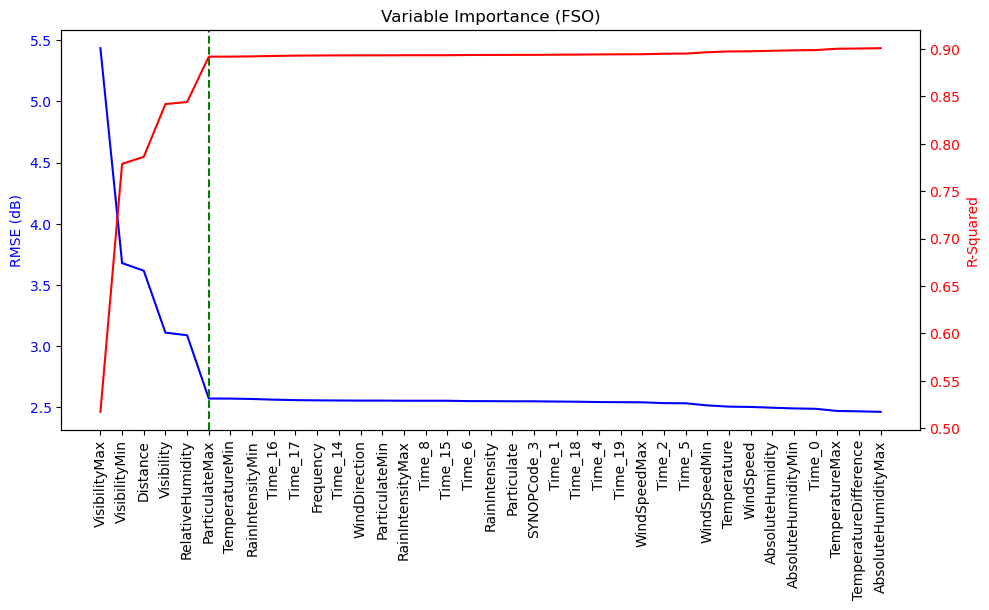

In [14]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 5
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')
fig.tight_layout()  # For better spacing
plt.title('Variable Importance (FSO)')

plt.show()


In [15]:
selected_features_FSO = [
    'RainIntensityMax', 
    'RelativeHumidity', 
    'Visibility',
    'Distance',
    'VisibilityMin',
    'VisibilityMax'
]


In [16]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 3.174784108288356
Test R^2: 0.8843797937112798
